In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("clean/cleaned_student_performance.csv")

data = data.select_dtypes(include=[np.number])


scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


In [4]:
#0.95
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(data_scaled)


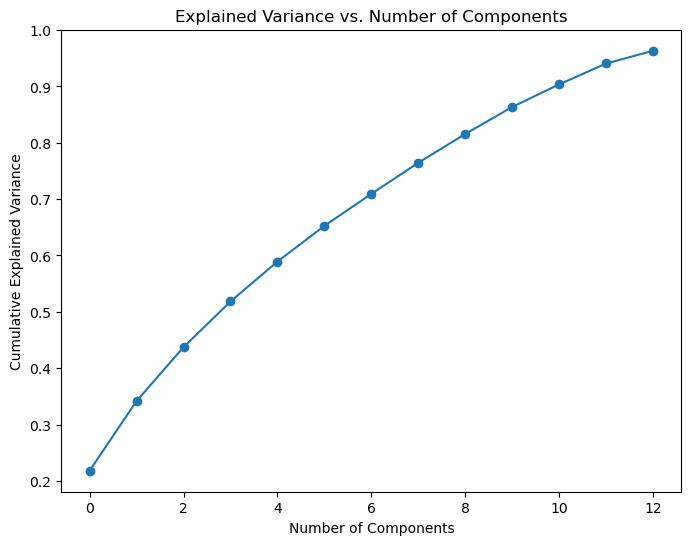

In [5]:
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()


In [6]:
column_names = []


for i in range(principal_components.shape[1]):
    column_name = f'PC{i+1}'
    column_names.append(column_name)


principal_df = pd.DataFrame(
    principal_components,
    columns=column_names
)

In [7]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

column_names = []


for i in range(len(pca.explained_variance_)):
    column_name = f'PC{i+1}'
    column_names.append(column_name)


loading_df = pd.DataFrame(
    loadings,
    columns=column_names,
    index=data.columns
)
